# Импорты

In [1]:
from datetime import date, datetime

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from catboost import Pool

import matplotlib.pyplot as plt

# Функции

In [2]:
def cat_num_split(df: pd.DataFrame) -> tuple:
    '''Ищем категориальные и числовые признаки в датафрейме'''

    cat_columns = []
    num_columns = []

    for column_name in df.columns:
        if (df[column_name].dtypes == object):
            cat_columns += [column_name]
        else:
            num_columns += [column_name]

    print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))
    print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

    return cat_columns, num_columns

In [3]:
def target_columns_dropper(df: pd.DataFrame) -> pd.DataFrame:
    '''Сбрасываем столбцы с целевыми переменными ответа банков'''
    df = df.copy()
    banks = ['BankA_decision',
             'BankB_decision',
             'BankC_decision',
             'BankD_decision',
             'BankE_decision']
    try:
        df.drop(banks, axis='columns', inplace=True)
    except:
        print('Dataframe have not target columns')

    return df

In [4]:
def CarierLevel_feature_creator_v2(df: pd.DataFrame) -> pd.Series:
    """
    Варианты преобразования:
    НИЗШЕЕ_ЗВЕНО     1809    рабочие специальности
    СРЕДНЕЕ_ЗВЕНО    1302    рядовые инженеры, врачи и специалисты с высшим образованием
    МЕН1              921    старшие менеджеры
    МЕН2              583    менеджеры
    ДИР1              242    генеральные директора и им подобные
    ДИР2              554    директора магазинов, направлений и им подобные
    САМ               521    самозанятые
    ИП                404    индивидуальные предприниматели
    ЗАМДИР            128    заместители директоров
    РЕЗЕРВ            109    те кто без работы
    ЗАМНАЧ             30
    """
    f = df['Position'].copy()
    f = f.str.lower()
    f = f.str.strip()
    f1 = f
    L_7 = [
    "генеральный директор",
    "генеральный дирекор",
    "генеральный",
    "гене",
    "генер",
    "генера",
    'генераль',
    "ген дир",
    "ген",
    "учредитель",
    'соучредитель',
    'собственник',
    'полномочный представитель президента',
    'председатель наблюдательского совета',
    'президент'
    ]
    for s in L_7:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР1')
    L_6 = [
    "директор",
    'директрор',
    "руководитель",
    "директор филиала/ департамента",
    'директор магазина',
    'дирек',
    'дирек',
    'дире',
    'дир',
    'председатель',
    'продюссер'
    ]
    for s in L_6:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР2')
    L_5 = [
    "заместитель директора",
    "заместитель генерального директора",
    'заместитель директора',
    "зам",
    "коммерческий директор",
    "заместитель / и.о. генерального директора",
    "и.о. заместитель ген. директора по развитию",
    "зам.руководителя",
    'зам.зав аптекой'
    ]
    for s in L_5:
       f1 = f1.mask(lambda  x : x == s, other = 'ЗАМДИР')
    L_4 = [
      "старший менеджер",
      "старший мене",
      "старший менедж",
      "ведущий менеджер",
      "главный менеджер",
      "главный специалист",
      'главный спе'
      "главный инженер",
      "менеджер",
      "мене",
      "менед",
      "руков",
      "руко",
      "рук",
      "главный бухгалтер",
      'главный бух',
      "начальник отдела",
      "начальник",
      "продюсер",
      "руководитель отдела",
      "менеджер по работе с ключевыми клиентами",
      "начальнык отдела",
      "начальник п",
      'менеджер по работе с маркетплейсами',
      'руководитель колл-центра',
      'начальник участка',
      'руководитель отдела продаж',
      'региональный менеджер',
      'директор по развитию',
      'заведующая отделением',
      'старший администратор',
      'главный технолог',
      'командир',
      'рукводитель',
      'шеф',
      'управляющий магазином',
      'старший мен',
     'старший тренер'
    ]
    for s in L_4:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН1')
    L_3 = [
     "администратор",
     "админи",
     "адм",
     "вдминистратор",
     'адми',
     "управляющий",
     "управляющая",
     'управ',
     "менеджер по продажам",
     "специалист по продажам",
     "менедж",
     'мэнеджер',
     'мннеджер',
     "мастер",
     "маст",
     "оператор склада",
     "менеджер по работе с маркетплейсами",
     'руководитель колл-центра', 'заведующий складом',
     'менеджер по закупкам','менеджер по закупке',
     'старший продавец',
     'менеджер торговой зоны',
     'старший сотрудник охраны',
     'командир отдедения',
     'командир отделения',
     'старший кладовщик',
     'старший продавец-консультант',
     'заведующий',
     'бригадир',
     'бриг',
     'админ',
     'организатор'
     'управляющий персоналом',
     'управляющий персоналом',
     'управляющий отделением',
     'заведующая производством',
     'главный библиотекарь',
     'старший инструктор',
     'кассир-контроллер',
     'старшая акушерка',
     'старший кассир',
     'администрато',
     'руководител',
     'главный мех',
     'управляющи',
     'старший ме',
     'шеф-повар',
     'управляющ',
     'управляю',
     'админист',
     'управля',
     'менедже',
     'директо',
     'админис',
     'управл',
     'руково',
     'завуч',
     'нача',
     'организатор перевозок',
     'заведующая складом',
     'старший капитан'
     ]
    for s in L_3:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН2')
    L_2 = [
   "старший специалист",
   "старший спец",
   "ведущий специалист",
   'ведущий спе',
   'логопед',
   'психолог',
   'воспит',
   'вос',
   'дизайнер',
   "товаровед",
   "маркетолог",
   'hr',
  'кадровый работник',
   "бухгалтер",
   'бухга',
   'бухг'
   "бух",
   'бух',
   "преподаватель",
   "препо",
   "учитель",
   "инженер",
   'инже',
   "инж",
   "оператор",
   "врач",
   "программист",
   "графический дизайнер",
   "репетитор",
   "технолог",
   "экономист",
   "юрист",
   "адвокат",
   "редседатель",
   "машинист",
   "хормейстер",
   "ведущий инженер",
   "старший слесарь",
   "системный администратор",
   "воспитатель",
   "эксперт",
   "доцент",
   "финансовый консультант",
   'фин',
   "аналитик",
   'средний медперсонал',
   'маркето',
   'режиссер',
   'режиссер',
   'музыкальный р',
   'кассир-контролер',
   'секретарь',
   'риэлтор',
   'риэ',
   'риелтор',
   'педагог',
   'пластический хирург',
   'логопед'
   "специалист",
   "спец",
   "специ",
   "specialist",
   'дизайнер',
   "копирайтер",
   "педагог до",
   'Учитель-логопед.',
   'учит',
   'учит',
   'учите',
   'учи',
   'юрисконсульт',
   'юридический консультант',
   'провизор',
   'коуч',
   'прог',
   'логист',
   'электроник /электронщик',
   'эксперт в сфере образования',
   'художник театрального костюма',
   'финансовый контроллер',
   'тренер групповых программ',
   'старший инжинер по разработке',
   'солист военного оркестра',
   'секретарь учебной части',
   'разработчик автоворонок',
   'педагог дополнительного образования',
   'мастер строительных работ',
   'мастер производственного обучения вождению',
   'агент по недвижимости',
   'финансовый советник',
   'младший воспитатель',
   'эксперт по рекламе',
   'управляющий делами',
   'социальный педагог',
   'машинист тепловоза',
   'днелопроизводитель',
   'старший товаровед',
   'профессор кафедры',
   'старший психолог',
   'культорганизатор',
   'химик-технолог',
   'мастер участка',
   'концертмейстер',
   'преподователь',
   'авиадиспетчер',
   'главный спец',
   'библиотекарь',
   'тестировщик',
   'старший тех',
   'старший спе',
   'старший инс',
   'следователь',
   'разработчик',
   'организатор',
   'нутрициолог',
   'главный спе',
   'таргетолог',
   'специолист',
   'метеоролог',
   'главный бу',
   'фрилансер',
   'сценарист',
   'специалст',
   'научный с',
   'маршейдер',
   'лешмейкер',
   'штурман',
   'фриланс',
   'препода',
   'подолог',
   'воспита',
   'специа',
   'релтор',
   'режисс',
   'препод',
   'логист',
   'инжене',
   'дизай',
   'воспи',
   'фарм',
   'медицинский психолог',
   'геолог',
   'кредитный эксперт'
    ]
    for s in L_2:
      f1 = f1.mask(lambda  x : x == s, other = 'СРЕДНЕЕ_ЗВЕНО')
    L_1 = [
     'лесной пожарный',
     'мастер бровист',
     'контролер кпп',
     'бьюти мастер',
     'мастер ман',
     'кровельщик',
     'Мед сестра',
     'астролог',
     'турагент',
     'аниматор',
     'волонтер',
     'массажист',
     'сушильщик',
     'рядовой',
     'самелье',
     'санитар',
     'медбрат',
     "уборщик",
     "сиделка",   
     "водитель",
     "продавец",
     "прода",
     "повар",
     "официант",
     "курьер",
     "консультант",
     "продавец-консультант",
     "продавец консультан",
     "продавец-кассир",
     "кладовщик",
     "косметолог",
     "сотрудник охраны",
     "слесарь",
     "сле",
     "кассир",
     "массажист",
     "электромонтер",
     "монтажник",
     "мастер маникюра",
     "электрик",
     "элек",
     "торговый представитель",
     "механик",
     "супервайзер",
     "инструктор",
     "персональный менеджер",
     "водитель-экспедитор",
     "водит",
     "продавец кассир",
     "рабочий",
     'сварщик',
     'свар',
     'агент',
     'диспетчер',
     'медицинская сестра',
     'медсестра',
     'токарь',
     "офи",
     'офици',
     'тренер',
     'владелец',
     'психолог-консультант',
     'помощник юриста',
     "швея",
     'шве',
     "парикмахер",
     "техник",
     'охранник',
     'охр',
     'няня',
     'косметолог-визажист',
     'сотрудник',
     'сотрудник склада',
     'кондитер',
     'фельдшер',
     'формовщик',
     'маляр',
     'проходчик',
     'техперсонал',
     'строитель',
     'клад',
     'наставник',
     'уборщица',
     'оптометрист',
     'пекарь',
     'официа',
     'контралер',
     'разнорабочая',
     'кладов',
     'комплектовщик',
     'термист',
     'бар',
     'бариста',
     'моряк',
     'стано',
     'сторож',
     'таксис',
     'грузчик',
     'пред'
     ]
    for s in L_1:
      f1 = f1.mask(lambda  x : x == s, other = 'НИЗШЕЕ_ЗВЕНО')
    f1 = f1.mask(lambda x : x == "индивидуальный предприниматель", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальный пре", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальный", other = 'ИП')
    f1 = f1.mask(lambda x : x == "инд", other = 'ИП')
    f1 = f1.mask(lambda x : x == "ип", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индив", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индиви", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальны", other = 'ИП')
    f1 = f1.mask(lambda x : x == "инди", other = 'ИП')
    f1 = f1.mask(lambda x : x == "предприниматель", other = 'ИП')
    f1 = f1.mask(lambda x : x == "предпри", other = 'ИП')
    f1 = f1.mask(lambda x : x == "самозанятый", other = 'САМ')
    f1 = f1.mask(lambda x : x == "самозанятая", other = 'САМ')
    f1 = f1.mask(lambda x : x == "самоазанятый", other = 'САМ')
    f1=f1.fillna('НЕТ_ДАННЫХ')
    Filled = ['ДИР1','ДИР2', 'МЕН1', 'МЕН2','ИП','САМ',
              'ЗАМДИР','ЗАМНАЧ', 'НИЗШЕЕ_ЗВЕНО', 'СРЕДНЕЕ_ЗВЕНО', 'НЕТ_ДАННЫХ', "РЕЗЕРВ"]
    # Названия должностей которые входят в некоторую строку.
    f1[f1.str.contains('рабочий')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('слесарь')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('помощник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сборщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('руководитель')] = 'МЕН1'
    f1[f1.str.contains('начальник ')] = 'МЕН1'
    f1[f1.str.contains('самоз')] = 'САМ'
    f1[f1.str.contains('инспектор')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('инженер')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('врач')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('вра')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('фармацевт')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('старший специалист')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('представитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('преподаватель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('ведущий')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('бухг')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('учитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('заместитель директора')] = 'ЗАМДИР'
    f1[f1.str.contains('заместитель')] = 'ЗАМНАЧ'
    f1[f1.str.contains('заме')] = 'ЗАМНАЧ'
    f1[f1.str.contains('оператор')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('лаборант')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('электрик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продавец')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сварщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('менеджер')] = 'МЕН2'
    f1[f1.str.contains('главный специалист')] = 'МЕН2'
    f1[f1.str.contains('специалист')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтажник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('водитель ')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('парикмахер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('ногтевого')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('санитарка')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продав')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('техник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продовец')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('директор')] = 'ДИР2'
    f1[f1.str.contains('безработный')] = 'РЕЗЕРВ'
    #f1 = f1[~f1.isin(Filled)] # Временно убираем обработанные строки.
    f1[~f1.isin(Filled)] = 'НИЗШЕЕ_ЗВЕНО'
    #print(contain_values)
    CarierLevel = f1

    return CarierLevel


def features_creator_pipe(df: pd.DataFrame) -> pd.DataFrame:
   '''Пайплайн  создания признаков, необходимых для работы модели'''
   df = df.copy()

   return df

In [5]:
def create_cat_pool(
        df: pd.DataFrame, 
        feature_name: str
        ) -> tuple:
    '''Создаем тренировочный и валидационный набор для CatBoost'''
    X = df.drop(feature_name, axis=1)
    y = df[feature_name]
    features_names = list(X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    cat_features, num_features = cat_num_split(X)
    train_data = Pool(
        data=X_train, 
        label=y_train,
        cat_features=cat_features,
        feature_names=features_names
    )
    eval_data = Pool(
        data=X_test,
        label=y_test,
        cat_features=cat_features,
        feature_names=features_names
    )

    return train_data, eval_data, features_names

In [6]:
def create_cls_model(
        train_data,
        eval_data,
        features_names
        ) -> CatBoostClassifier:
    '''Создаем модель классификатора CatBoost'''
    model = CatBoostClassifier(task_type="GPU", iterations=5000, early_stopping_rounds=100)
    model.fit(X=train_data, eval_set=eval_data)

    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(np.array(features_names)))
    fig = plt.figure(figsize=(8, 8))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.title('Распределение весов входных параметров')
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.array(features_names)[sorted]);
    plt.show()

    return model

In [7]:
def create_reg_model(
        train_data,
        eval_data,
        features_names
        ) -> CatBoostRegressor:
    '''Создаем модель классификатора CatBoost'''
    model = CatBoostRegressor(task_type="GPU", iterations=5000, early_stopping_rounds=100)
    model.fit(X=train_data, eval_set=eval_data)

    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(np.array(features_names)))
    fig = plt.figure(figsize=(8, 8))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.title('Распределение весов входных параметров')
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.array(features_names)[sorted]);
    plt.show()

    return model

In [65]:
def datetime_to_timestamp(x):
    '''Переводим дату-время в timestamp'''

    return x // 10 ** 9 

# Загружаем датасет

In [8]:
df = pd.read_csv(
    filepath_or_buffer='../data/cleared_df.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate']
    )
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6603 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6603 non-null   datetime64[ns]
 1   education          6603 non-null   object        
 2   employment status  6603 non-null   object        
 3   Value              6603 non-null   object        
 4   JobStartDate       6603 non-null   datetime64[ns]
 5   Position           6603 non-null   object        
 6   MonthProfit        6603 non-null   float64       
 7   MonthExpense       6603 non-null   float64       
 8   Gender             6603 non-null   float64       
 9   Family status      6603 non-null   object        
 10  ChildCount         6603 non-null   float64       
 11  SNILS              6603 non-null   float64       
 12  BankA_decision     6603 non-null   object        
 13  BankB_decision     6603 non-null   object        
 14  BankC_dec

Разделяю исходную выборку на тренировочный датасет, на котором буду учить модели, и тестовую часть, на которой потом буду испытывать метрику качества заполнения.

In [53]:
df_train, df_test, _, _ = train_test_split(df,
                                           df['BankA_decision'],
                                           shuffle=True,
                                           test_size=0.2,
                                           random_state=42)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293 entries, 3099.0 to 1266.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          1293 non-null   datetime64[ns]
 1   education          1293 non-null   object        
 2   employment status  1293 non-null   object        
 3   Value              1293 non-null   object        
 4   JobStartDate       1293 non-null   datetime64[ns]
 5   Position           1293 non-null   object        
 6   MonthProfit        1293 non-null   float64       
 7   MonthExpense       1293 non-null   float64       
 8   Gender             1293 non-null   float64       
 9   Family status      1293 non-null   object        
 10  ChildCount         1293 non-null   float64       
 11  SNILS              1293 non-null   float64       
 12  BankA_decision     1293 non-null   object        
 13  BankB_decision     1293 non-null   object        
 14  BankC_

In [56]:
df_test.to_csv('test_data.csv', sep=';', index=True)

In [57]:
df = df_train.copy()

In [9]:
# Сбрасываем целевые метки
df = target_columns_dropper(df)

In [10]:
cat_columns, num_columns = cat_num_split(df)

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  6
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10


In [11]:
df['BirthDate'] = df['BirthDate'].dt.year
#df['BirthDate'] = df['BirthDate'].astype(np.int64)
#df['BirthDate'] = df['BirthDate'].apply(datetime_to_timestamp)

In [12]:
df['JobStartDate'] = df['JobStartDate'].dt.year
#df['JobStartDate'] = df['JobStartDate'].astype(np.int64)
#df['JobStartDate'] = df['JobStartDate'].apply(datetime_to_timestamp)

In [13]:
df['Position'] = CarierLevel_feature_creator_v2(df)

In [14]:
df.head(3)

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,
1.0,1988,Высшее - специалист,Работаю по найму полный рабочий день/служу,9 - 10 лет,2013,МЕН1,180000.0,90000.0,0.0,Никогда в браке не состоял(а),0.0,0.0,77.0,137000.0,18.0,Furniture
2.0,1998,Высшее - специалист,Собственное дело,1 - 2 года,2022,ДИР2,200000.0,60000.0,0.0,Никогда в браке не состоял(а),0.0,0.0,27.0,33000.0,6.0,Fitness
3.0,1972,Высшее - специалист,Работаю по найму полный рабочий день/служу,10 и более лет,2005,ДИР2,300000.0,45000.0,1.0,Никогда в браке не состоял(а),0.0,0.0,19.0,165000.0,24.0,Medical_services


# Создаем файлы моделей

Для классификационных моделей: 'education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_term'

Для регрессионных моделей: 'MonthProfit', 'MonthExpense', 'Loan_amount'

Не делаю моделей: 'BirthDate', 'JobStartDate'

## Классификационная

In [32]:
df['employment status'].unique()

array(['Работаю по найму полный рабочий день/служу', 'Собственное дело',
       'Работаю по найму неполный рабочий день', 'Студент', 'Пенсионер',
       'Не работаю', 'Декретный отпуск'], dtype=object)

categorical columns:	  ['education', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10
Learning rate set to 0.061572
0:	learn: 1.7525300	test: 1.7555430	best: 1.7555430 (0)	total: 8.85ms	remaining: 44.2s
1:	learn: 1.6056189	test: 1.6108021	best: 1.6108021 (1)	total: 16.5ms	remaining: 41.3s
2:	learn: 1.4900258	test: 1.4963462	best: 1.4963462 (2)	total: 24.1ms	remaining: 40.1s
3:	learn: 1.3963379	test: 1.4038998	best: 1.4038998 (3)	total: 32.1ms	remaining: 40.1s
4:	learn: 1.3148921	test: 1.3227716	best: 1.3227716 (4)	total: 39.6ms	remaining: 39.6s
5:	learn: 1.2455050	test: 1.2536261	best: 1.2536261 (5)	total: 47.2ms	remaining: 39.2s
6:	learn: 1.1843989	test: 1.1930204	best: 1.1930204 (6)	total: 55.3ms	remaining: 39.5s
7:	learn: 1.1308216	test: 1.1399490	best: 1.1399490 (7)	total: 62.9ms	remaining: 39.3s
8

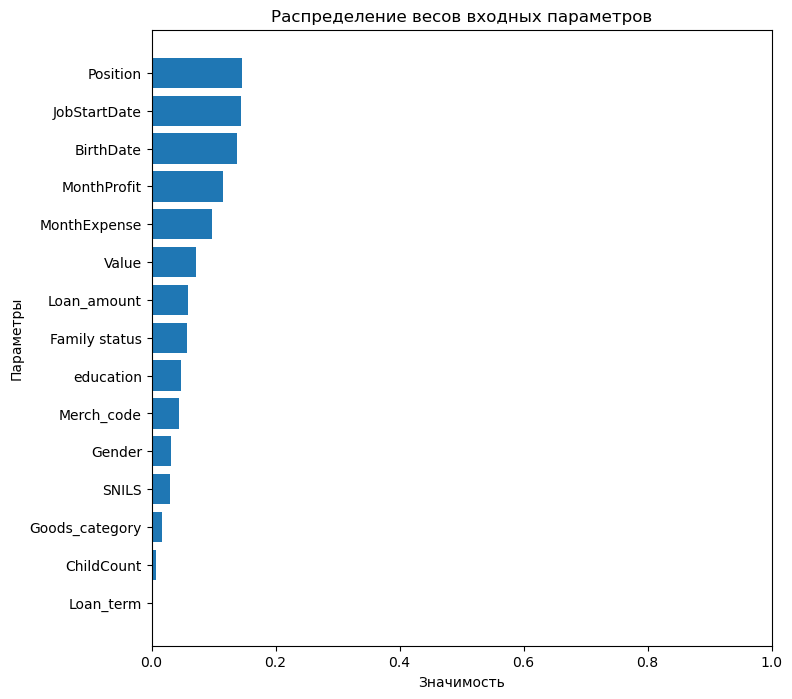

In [33]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'employment status')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('../models/employment status.cls')

## Регрессионная

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  6
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_term'] 
 len =  9
Learning rate set to 0.046986
0:	learn: 48706.5046373	test: 49054.1665764	best: 49054.1665764 (0)	total: 9.77ms	remaining: 48.8s
1:	learn: 46621.2038912	test: 46962.1746668	best: 46962.1746668 (1)	total: 26ms	remaining: 1m 5s
2:	learn: 44647.8079071	test: 44983.4587736	best: 44983.4587736 (2)	total: 37.4ms	remaining: 1m 2s
3:	learn: 42769.0959657	test: 43098.9977804	best: 43098.9977804 (3)	total: 46.9ms	remaining: 58.6s
4:	learn: 40987.6238543	test: 41311.7637161	best: 41311.7637161 (4)	total: 56.8ms	remaining: 56.7s
5:	learn: 39299.8031725	test: 39617.5039381	best: 39617.5039381 (5)	total: 71.7ms	remaining: 59.7s
6:	learn: 37706.3206947	test: 38017.7210936	best: 38017.7210936 (6)	total: 86.7ms	remaining: 1m 1s
7

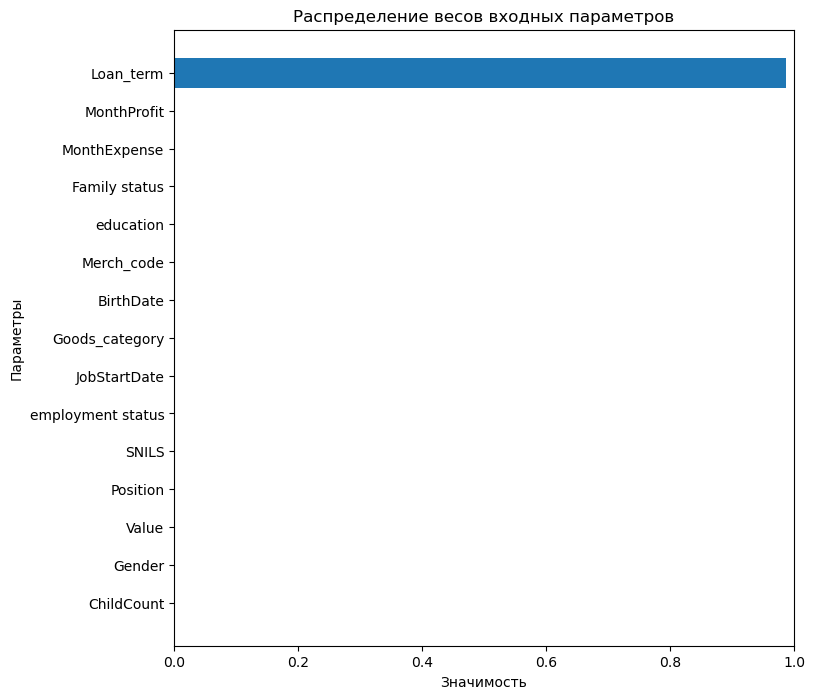

In [17]:
train_data, eval_data, features_names = create_cat_pool(df, 'Loan_amount')
# Обучаем модель
model = create_reg_model(train_data, eval_data, features_names)
model.save_model('../models/Loan_amount.reg')

## Модели для конкретных фич

### Модель для столбца education

In [44]:
df['education'].unique()

array(['Высшее - специалист', 'Среднее', 'Бакалавр',
       'Среднее профессиональное', 'Неоконченное высшее',
       'Несколько высших', 'Магистр', 'Неоконченное среднее',
       'Ученая степень', 'MBA'], dtype=object)

Модель будет однозначно классификационная, так как целевая переменная - 10 вариантов текстовых меток на русском языке.

In [45]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'education')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)

categorical columns:	  ['employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10


CatBoostError: /src/catboost/catboost/private/libs/algo/data.cpp:196: Dataset test #0 contains class label "\xD0\xA3\xD1\x87\xD0\xB5\xD0\xBD\xD0\xB0\xD1\x8F \xD1\x81\xD1\x82\xD0\xB5\xD0\xBF\xD0\xB5\xD0\xBD\xD1\x8C" that is not present in the learn dataset

In [89]:
model.save_model('education.cls')

### Модель для столбца employment status

In [66]:
df['employment status'].unique()

array(['Работаю по найму полный рабочий день/служу', 'Собственное дело',
       'Работаю по найму неполный рабочий день', 'Пенсионер',
       'Декретный отпуск', 'Не работаю', 'Студент'], dtype=object)

categorical columns:	  ['education', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10
Learning rate set to 0.06007
0:	learn: 1.7630871	test: 1.7692385	best: 1.7692385 (0)	total: 13.8ms	remaining: 1m 8s
1:	learn: 1.6207036	test: 1.6313225	best: 1.6313225 (1)	total: 25.7ms	remaining: 1m 4s
2:	learn: 1.5064590	test: 1.5196882	best: 1.5196882 (2)	total: 37.5ms	remaining: 1m 2s
3:	learn: 1.4144618	test: 1.4299641	best: 1.4299641 (3)	total: 47.5ms	remaining: 59.3s
4:	learn: 1.3345338	test: 1.3512806	best: 1.3512806 (4)	total: 57.7ms	remaining: 57.6s
5:	learn: 1.2659445	test: 1.2842023	best: 1.2842023 (5)	total: 68.6ms	remaining: 57.1s
6:	learn: 1.2055515	test: 1.2251224	best: 1.2251224 (6)	total: 78.4ms	remaining: 56s
7:	learn: 1.1508074	test: 1.1722859	best: 1.1722859 (7)	total: 88.1ms	remaining: 54.9s
8:	l

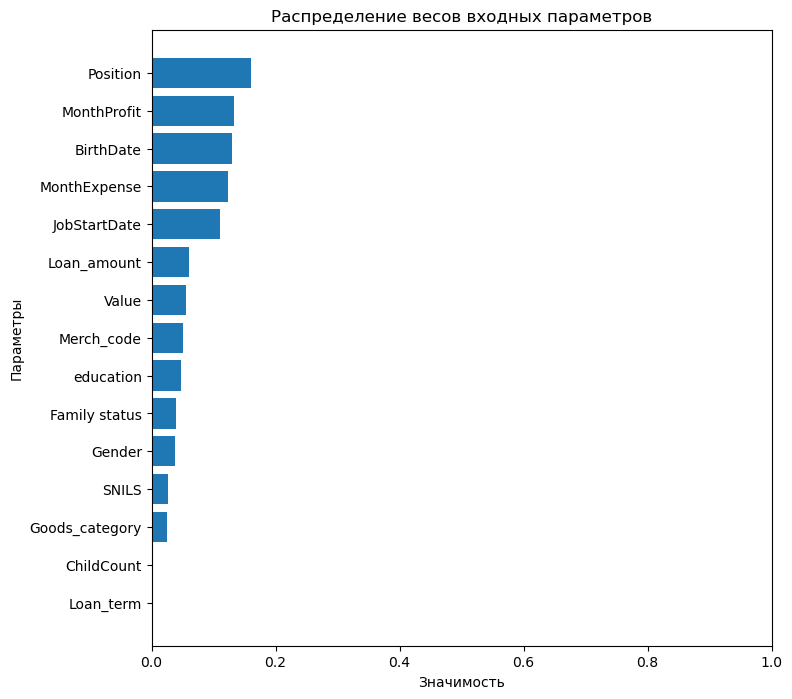

In [67]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'employment status')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('employment status.cls')

### Модель для столбца Value

In [68]:
df['Value'].unique()

array(['4 - 5 лет', '3 - 4 года', '10 и более лет', '5 - 6 лет',
       '8 - 9 лет', '6 - 7 лет', '2 - 3 года', '1 - 2 года', '9 - 10 лет',
       '7 - 8 лет', '6 месяцев - 1 год', '4 - 6 месяцев',
       'менее 4 месяцев'], dtype=object)

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10
Learning rate set to 0.06007
0:	learn: 2.2652262	test: 2.2640679	best: 2.2640679 (0)	total: 15.5ms	remaining: 1m 17s
1:	learn: 2.0876068	test: 2.0843590	best: 2.0843590 (1)	total: 29.9ms	remaining: 1m 14s
2:	learn: 1.9651017	test: 1.9609583	best: 1.9609583 (2)	total: 44.6ms	remaining: 1m 14s
3:	learn: 1.8657100	test: 1.8616840	best: 1.8616840 (3)	total: 58.6ms	remaining: 1m 13s
4:	learn: 1.7843889	test: 1.7816083	best: 1.7816083 (4)	total: 73.1ms	remaining: 1m 13s
5:	learn: 1.7156417	test: 1.7142411	best: 1.7142411 (5)	total: 87.4ms	remaining: 1m 12s
6:	learn: 1.6564343	test: 1.6569614	best: 1.6569614 (6)	total: 100ms	remaining: 1m 11s
7:	learn: 1.6027702	test: 1.6054118	best: 1.6054118 (7)	total: 113ms	re

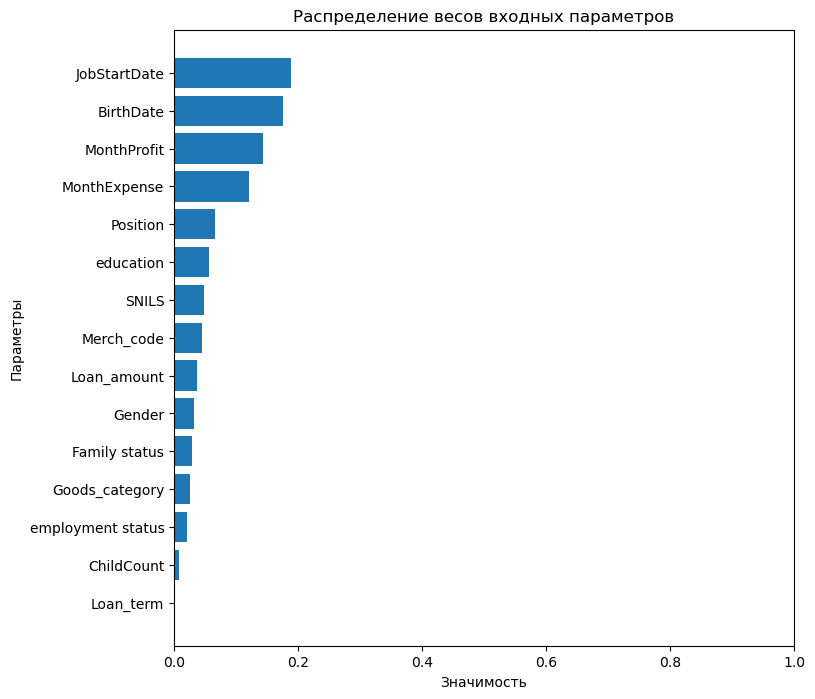

In [69]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'Value')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('Value.cls')